# MLG: Lab SOM (Part 1)

Throughout the laboratories, questions that you should try to answer are highlighted as follows :

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: Try to answer these questions for your own comprehension. </p>


## Introduction

In this laboratory, we will work with a different type of problem called unsupervised learning.
When we talk about unsupervised learning, it means that we are trying to find **hidden structure** in unlabeled data. Therefore, no simple measure exists to evaluate a potential solution.


We will focus on a commonly used algorithm to solve this kind of problem called "Self Organizing Maps".
As you saw in the theoretical part of the course, the main advantage of this algorithm is its topological ordering, which means that the maps can be visualized as **elastic grids**. Therefore they can be easily plotted.

## Pre-requisites

For the following exercises, you could need several new packages. Install them as follows:

    $ pip install kohonen
    
After these, you should be able to import them. If any error occurs after, it maybe because some modules are missing. Try to install them with:

    $ conda install name_of_the_missing_module

## Exercise 1 : Animals

### Dataset information

In the general sense, the Self-Organizing Maps algorithm is used as a dimensionality reduction algorithm. It transforms a "n-dimensional" data into a 2-dimensional elastic grid.

In this particular exercise, we will look at an example from the course: applying SOM on animals data.

Each row is an animal, and is constructed by the presence (1) or absence (0) of 13 different attributes. You can look at the plot hereafter, or generate it yourself with this code:

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


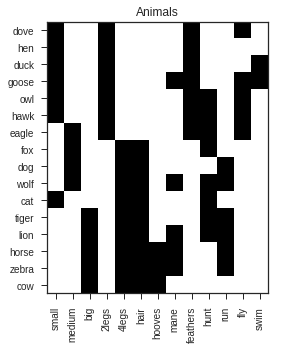

In [1]:
import KohonenUtils
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import cm
import matplotlib.patches as mpatches
import math
%matplotlib inline

animals = pd.DataFrame(columns=['small', 'medium', 'big', '2legs', '4legs', 'hair', 'hooves',
                                'mane', 'feathers', 'hunt', 'run', 'fly', 'swim'])

matrix = np.array([[1,0,0,1,0,0,0,0,1,0,0,1,0],
                   [1,0,0,1,0,0,0,0,1,0,0,0,0],
                   [1,0,0,1,0,0,0,0,1,0,0,0,1],
                   [1,0,0,1,0,0,0,1,1,0,0,1,1],
                   [1,0,0,1,0,0,0,0,1,1,0,1,0],
                   [1,0,0,1,0,0,0,0,1,1,0,1,0],
                   [0,1,0,1,0,0,0,0,1,1,0,1,0],
                   [0,1,0,0,1,1,0,0,0,1,0,0,0],
                   [0,1,0,0,1,1,0,0,0,0,1,0,0],
                   [0,1,0,0,1,1,0,1,0,1,1,0,0],
                   [1,0,0,0,1,1,0,0,0,1,0,0,0],
                   [0,0,1,0,1,1,0,0,0,1,1,0,0],
                   [0,0,1,0,1,1,0,1,0,1,1,0,0],
                   [0,0,1,0,1,1,1,1,0,0,1,0,0],
                   [0,0,1,0,1,1,1,1,0,0,1,0,0],
                   [0,0,1,0,1,1,1,0,0,0,0,0,0]])

for i, row in enumerate(matrix):
    animals.loc[i] = row

animals.index = ['dove', 'hen', 'duck', 'goose', 'owl', 'hawk', 'eagle', 'fox',
                 'dog', 'wolf', 'cat', 'tiger', 'lion', 'horse', 'zebra', 'cow']

pl.figure(figsize=(5,5))
pl.xticks(np.arange(matrix.shape[1]), animals.columns, rotation=90)
pl.yticks(np.arange(matrix.shape[0]), animals.index)
pl.title('Animals')
_ = pl.imshow(matrix, interpolation='nearest', cmap=cm.binary)

This is the features on which we will run our SOM algorithm in order to find an inherent data structure, or similarities between samples.

### Definition of the problem

In this problem, we will apply the SOM algorithm as follows:
    
1. Initialize SOM with its parameters (such as size of the map, neighborood size, learning rate...)
2. Sequentially present a random sample animal for the map to learn
3. Repeat step 2 until the whole dataset was learned t times

After the SOM has been "trained", we can then visualize it by plotting its U-Matrix (also known as Unified Distance Matrix) which shows the neurons and the distance with their neighbors.
To construct a U-Matrix, we need to:

1. Create a cell for each neuron
2. Create a cell for each 1-1 connection between two neurons
3. Assign these new cells the distance between the two neurons they connect (higher is further apart)

In the end, if we have a very simple SOM (2x2):

    Neuron(0) - Neuron(1)
       |           |
    Neuron(2) - Neuron(4)

The corresponding U-Matrix (2\*2 -1=3, 2\*2 -1=3) will be:

    Neuron(0) - Dist(0,1) - Neuron(1)
       |           |           |
    Dist(0,2) -  ?????    - Dist(1,3)
       |           |           |
    Neuron(2) - Dist(2,3) - Neuron(3)
    

We are only going to plot the distances.

Let us present the animal dataset 10 times to a newly generated kohonen map. We can then compute its U-matrix and plot the result.

### First tests with SOM and U-Matrix

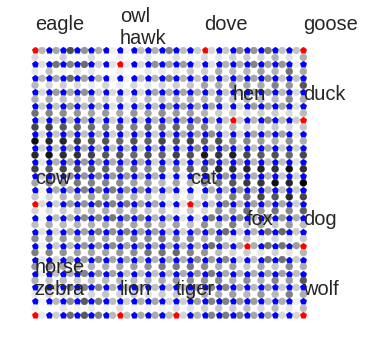

In [2]:
kmap = KohonenUtils.KohonenMap(20,
                               20,
                               size_vector=len(animals.columns))
n_iter = 10
learning_rate = KohonenUtils.ExponentialTimeseries(1, 0.2, n_iter * len(animals.index))
neighborhood_size = KohonenUtils.ExponentialTimeseries(4./3 * len(animals.index), 1, n_iter * len(animals.index))

kmap.train(animals.as_matrix(), np.array(animals.index), n_iter, learning_rate, neighborhood_size)

kmap.plot_umatrix(plot_names=True, plot_empty=True, fontsize=20)

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: Analyze the code (in KohonenUtils.py) to understand what are the uses of each block in the cell right above.</p>

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: What do you think about the clustering quality ? </p>

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: We plotted the U-Matrix in the previous cell. What does it represent ? </p>

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: What do the small stars represent ? What do the bigger circles represent ? </p>

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: What does the color in the big circles mean ? </p>

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: What does the color in the small stars mean ? </p>

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: Plot the learning rate and the neighborhood size. Why do you think we choose them like this? </p>

## Exercise 2 : Benchmark Datasets

### Dataset information

In this exercise, we will work with the FCPS benchmark published by A. Ultsch in his paper **"Clustering With SOM"**. FCPS stands for Fundamental Clustering Problems Suite, which is essentially 10 different datasets each having a main problem to adress. As you can find in the README associated with this benchmark, the data sets and main problems adressed are:

| data set      |   main problems of the set                          |   3d
|---            |---                                                  |   
| Hepta         |   none, i.e clear defined clusters                  |   **yes**
| Lsun          |   different variances and inter cluster distances   |   no
| Tetra         |   almost touching clusters                          |   **yes**
| Chainlink     |   linear not separable                              |   **yes**
| Atom          |   different variances and linear not separable      |   **yes**
| EngyTime      |   gaussian mixture                                  |   no
| Target        |   outlier                                           |   no
| TwoDiamonds   |   cluster border defined by density                 |   no
| WingNut       |   density vs. distance                              |   no
| GolfBall      |   no cluster at all                                 |   **yes**


Further reading: https://www.uni-marburg.de/fb12/arbeitsgruppen/datenbionik/data

The following script is designed to work with 3d datasets.

### Dataset visualization

In [ ]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

locations = pd.DataFrame(columns=['ID', 'X', 'Y', 'Z'])

# Datasets that work with this script are Hepta, Tetra, Chainlink, Atom, GolfBall (they are 3d)
# Datasets in this list do NOT work : Lsun, EngyTime, Target, TwoDiamonds, WingNut (they are 2d)
dataset_name = 'Chainlink'

# Load the 3d-location of each point
with open('FCPS_Data/' + dataset_name + '.lrn', 'r') as f:
    for i, line in enumerate(f):
        if line[0] == "%":
            continue
        key,x,y,z = line.rstrip().split("\t")
        locations.loc[i] = [int(key), float(x), float(y), float(z)]
        
# Load the classes of each point
classes = pd.DataFrame(columns=['ID', 'Class'])
with open('FCPS_Data/' + dataset_name + '.cls', 'r') as f:
    for i, line in enumerate(f):
        if line[0] == "%" or line[0] == "#":
            continue
        key,cl = line.rstrip().split("\t")
        classes.loc[i] = [int(key), int(cl)]

# Group the class labels with the 3d locations of each point
df = pd.merge(locations, classes, on='ID')
df = df.set_index('ID')
df.Class = df.Class.astype(int)

# Prints the first three rows
df.head(3)

In [ ]:
class_colors = KohonenUtils._discrete_colors_from_classes(classes.Class)

## Plots the dataset in 3d
fig = pl.figure()
ax = fig.add_subplot(111, projection='3d')
patches = []
for i in np.unique(df.Class):
    df_class = df[df.Class == i]
    ax.scatter(df_class.X, df_class.Y, df_class.Z, c=class_colors[i])
    patches.append(mpatches.Patch(color=class_colors[i], label='Class ' + str(i)))
pl.legend(handles=patches, bbox_to_anchor=(.5, 1.02, 1., .102),
                      loc=5, ncol=2, borderaxespad=0.)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
_ = pl.title(dataset_name)

### Clustering with SOM

In [ ]:
kmap = KohonenUtils.KohonenMap(side_rows=int(math.sqrt(len(df.index))),
                               side_cols=int(math.sqrt(len(df.index)) * 2),
                               size_vector=len(df.columns)-1)
n_iter = 3
learning_rate = KohonenUtils.ExponentialTimeseries(1, 0.2, n_iter * len(df.index))
neighborhood_size = KohonenUtils.ExponentialTimeseries(4./3 * len(df.index), 1, n_iter * len(df.index))

kmap.train(df.as_matrix()[:,:-1], np.array(df.Class), n_iter, learning_rate, neighborhood_size)

kmap.plot_umatrix(color_classes=True)

**Note:** the class labels are used only to visualize the results of our clustering method. They are NOT used to train our model as an error signal.

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: Which of these five different 3d datasets are clustered correctly by Self-Organizing Map algorithm ? (to try with other datasets, you just have to change the dataset_name variable value and re-run the cells) </p>

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: Which of these five different 3d datasets would K-Means correctly (or incorrectly) cluster ? Explain briefly why... </p>